In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import chi2
from scipy.optimize import minimize

# Problem 3

### Question a)

In [2]:
alpha_true = 0.
cov = np.array([[25., 0.], [0., 25.]])
inv_cov = np.linalg.inv(cov)

np.random.seed(100)
draws = np.random.multivariate_normal(mean=[alpha_true, alpha_true**2], cov=cov, size=10000)

def model_3_a(alpha):
    return np.array([alpha, alpha**2])


def compute_chi_2(d1, d2, alpha, model):
    mod = model(alpha)
    diff = np.array([d1 - mod[0], d2 - mod[1]])
    chi_2 = diff.T @ inv_cov @ diff  
    return chi_2  


def best_fit_alpha(d1, d2, model):
    chi_2_func = lambda alpha: compute_chi_2(d1, d2, alpha, model)
    result = minimize(chi_2_func, 0)
    return result.x[0]


In [3]:

alpha_arr = np.array([best_fit_alpha(d1, d2, model_3_a) for d1, d2 in draws])
chi2_arr = np.array([compute_chi_2(d1, d2, a, model_3_a) for a, (d1, d2) in zip(alpha_arr, draws)])

Text(0.5, 1.0, 'model $ \\mu = ( \\alpha, \\alpha^2 )$')

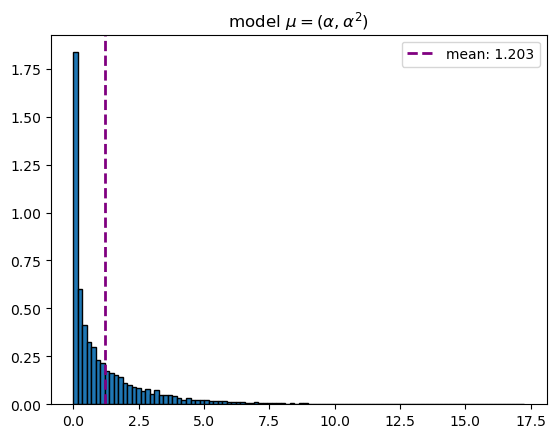

In [4]:
plt.hist(chi2_arr, bins=np.linspace(0, np.max(chi2_arr), 101), edgecolor="black", density=True);
plt.axvline(x=np.mean(chi2_arr), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr):.3f}")
plt.legend()
plt.title(r"model $ \mu = ( \alpha, \alpha^2 )$")

In [5]:
print(np.mean(alpha_arr))

0.012084416440881221


### Question b)

Text(0.5, 1.0, 'model $ \\mu = ( \\alpha, \\alpha^2 )$')

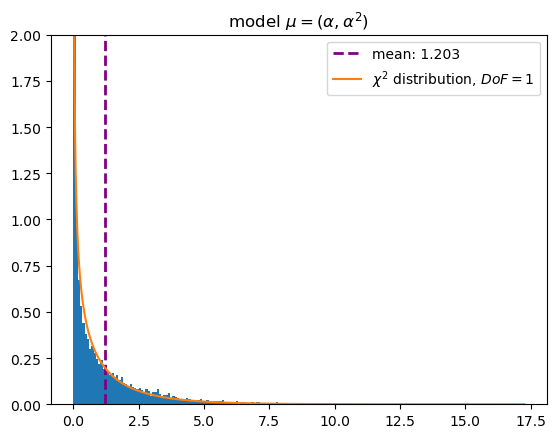

In [6]:
x_range = np.linspace(0, np.max(chi2_arr), 1001)

chi2_dist = chi2.pdf(x_range, 1)
plt.hist(chi2_arr, bins=np.linspace(0, np.max(chi2_arr), 201), density=True);
plt.axvline(x=np.mean(chi2_arr), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr):.3f}")
plt.plot(x_range, chi2_dist, label = "$\chi^2$ distribution, $DoF=1$")
plt.ylim(0, 2)

plt.legend()
plt.title(r"model $ \mu = ( \alpha, \alpha^2 )$")

### Question c)

In [7]:
def model_3_c(alpha):
    return np.array([alpha, alpha])

In [8]:

alpha_arr_c = np.array([best_fit_alpha(d1, d2, model_3_c) for d1, d2 in draws])
chi2_arr_c = np.array([compute_chi_2(d1, d2, a, model_3_c) for a, (d1, d2) in zip(alpha_arr_c, draws)])

Text(0.5, 1.0, 'model $ \\mu = ( \\alpha, \\alpha )$')

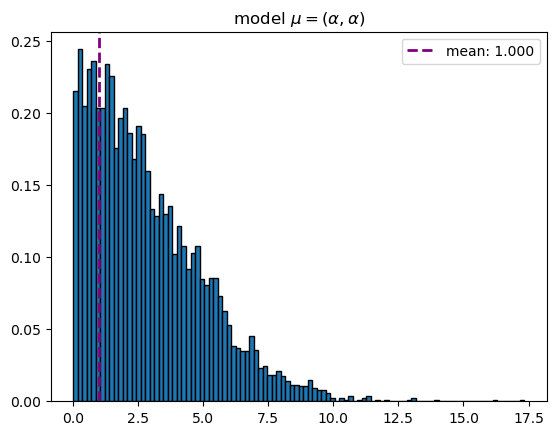

In [9]:
plt.hist(alpha_arr_c, bins=np.linspace(0, np.max(alpha_arr_c), 101), edgecolor="black", density=True);
plt.axvline(x=np.mean(chi2_arr_c), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr_c):.3f}")
# print(np.mean(chi2_arr))
plt.legend()
plt.title(r"model $ \mu = ( \alpha, \alpha )$")

Text(0.5, 1.0, 'model $ \\mu = ( \\alpha, \\alpha )$')

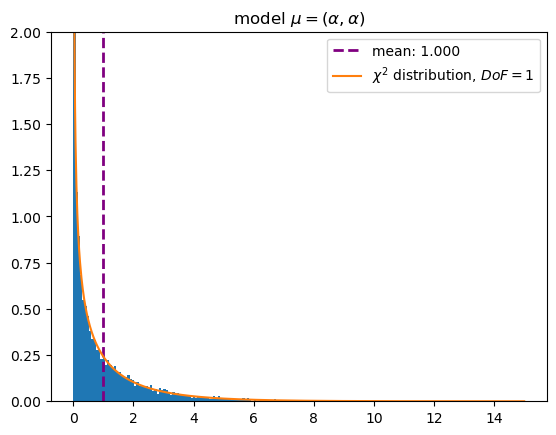

In [10]:
x_range_c = np.linspace(0, np.max(chi2_arr_c), 1001)

chi2_dist_c = chi2.pdf(x_range_c, 1)
plt.hist(chi2_arr_c, bins=np.linspace(0, np.max(chi2_arr_c), 201), density=True);
plt.axvline(x=np.mean(chi2_arr_c), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr_c):.3f}")
plt.plot(x_range_c, chi2_dist_c, label = "$\chi^2$ distribution, $DoF=1$")
plt.ylim(0, 2)

plt.legend()
plt.title(r"model $ \mu = ( \alpha, \alpha )$")


In [11]:
print(np.mean(alpha_arr_c))

0.0019956887262044232
